Init


In [1]:
import os
import pandas as pd

In [ ]:

DATA_PATH=r"C:\Yahia\Python\src\HDB\training\pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
lst = os.listdir(DATA_PATH)
df=pd.DataFrame()
for f in lst:
    x = pd.read_csv(os.path.join(DATA_PATH, f))
    df = pd.concat([df,x], axis=0)
    
# df.describe()

Data Cleanup

drop empty lines

In [3]:
df.dropna(inplace=True)
# all_data[all_data['Order ID'].isna()]

cleanup rows with headers from the data

In [6]:
df = df.loc[df['Order ID'] != 'Order ID']


convert order date to date format - add month column for easier handling

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df['Month'] = df['Order Date'].dt.to_period('M')

In [8]:
df['Total Sales'] = pd.to_numeric(df['Quantity Ordered']) * pd.to_numeric(df['Price Each'])

In [14]:
df.to_csv('sales_data_cleaned.csv')

In [23]:
sales = pd.read_csv('sales_data_cleaned.csv')

### Create city column

In [24]:
def get_city(x):
    # x = '917 1st St, Dallas, TX 75001'
    x_lst = x.split(',')
    city = x_lst[1]+'-' + x_lst[2][1:3]
    
    return city 

sales['City']  = sales['Purchase Address'].apply(get_city)

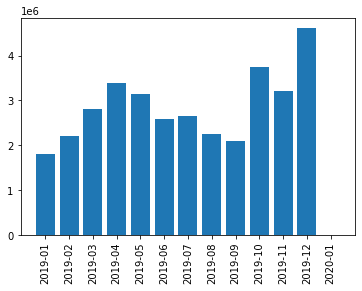

In [71]:
import  matplotlib.pyplot as plt

results=sales.groupby(['Month']).sum().sort_values(by=['Month'])
months = sales['Month'].unique()
months.sort()
# months.sort()
# months = range(1,14)
plt.bar(months, results['Total Sales'])
plt.xticks(months, rotation=90)
plt.show()

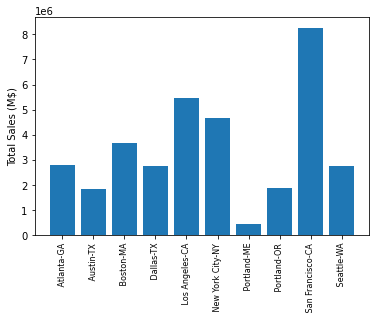

In [72]:
results=sales.groupby(['City']).sum().sort_values(by=['City'])
cities= sales['City'].unique()
cities.sort()
plt.bar(cities, results['Total Sales'])
plt.xticks(cities, rotation=90, size=8)
plt.ylabel('Total Sales (M$)')
plt.show()